In [16]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import matplotlib.pyplot as plt

In [17]:
# Load the IMDb dataset
(ds_train, ds_test), ds_info = tfds.load('imdb_reviews', split=['train', 'test'], with_info=True, as_supervised=True)

In [18]:
# Convert datasets to numpy arrays
train_reviews = []
train_labels = []
test_reviews = []
test_labels = []

In [19]:
for review, label in tfds.as_numpy(ds_train):
    train_reviews.append(review.decode('utf-8'))
    train_labels.append(label)

for review, label in tfds.as_numpy(ds_test):
    test_reviews.append(review.decode('utf-8'))
    test_labels.append(label)

In [20]:
train_reviews = np.array(train_reviews)
train_labels = np.array(train_labels)
test_reviews = np.array(test_reviews)
test_labels = np.array(test_labels)

In [21]:
# Tokenize the text data
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(train_reviews)
train_sequences = tokenizer.texts_to_sequences(train_reviews)
test_sequences = tokenizer.texts_to_sequences(test_reviews)

In [22]:
# Pad the sequences to ensure uniform input length
max_sequence_length = 200
X_train = pad_sequences(train_sequences, maxlen=max_sequence_length)
X_test = pad_sequences(test_sequences, maxlen=max_sequence_length)
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [23]:
# Build the LSTM model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=128, input_length=max_sequence_length),
    tf.keras.layers.LSTM(128, return_sequences=True),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [24]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [25]:
# Summary of the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 200, 128)          640000    
                                                                 
 lstm_2 (LSTM)               (None, 200, 128)          131584    
                                                                 
 lstm_3 (LSTM)               (None, 64)                49408     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 821057 (3.13 MB)
Trainable params: 821057 (3.13 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [26]:
# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/5
782/782 [==============================] - 56s 67ms/step - loss: 0.4521 - accuracy: 0.7884 - val_loss: 0.4223 - val_accuracy: 0.8064
Epoch 2/5
782/782 [==============================] - 24s 30ms/step - loss: 0.3766 - accuracy: 0.8364 - val_loss: 0.3585 - val_accuracy: 0.8487
Epoch 3/5
782/782 [==============================] - 21s 27ms/step - loss: 0.2689 - accuracy: 0.8904 - val_loss: 0.3212 - val_accuracy: 0.8633
Epoch 4/5
782/782 [==============================] - 19s 24ms/step - loss: 0.2405 - accuracy: 0.9040 - val_loss: 0.3447 - val_accuracy: 0.8586
Epoch 5/5
782/782 [==============================] - 19s 25ms/step - loss: 0.1907 - accuracy: 0.9282 - val_loss: 0.3644 - val_accuracy: 0.8487


In [27]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

782/782 [==============================] - 6s 8ms/step - loss: 0.3644 - accuracy: 0.8487
Test Accuracy: 0.8487


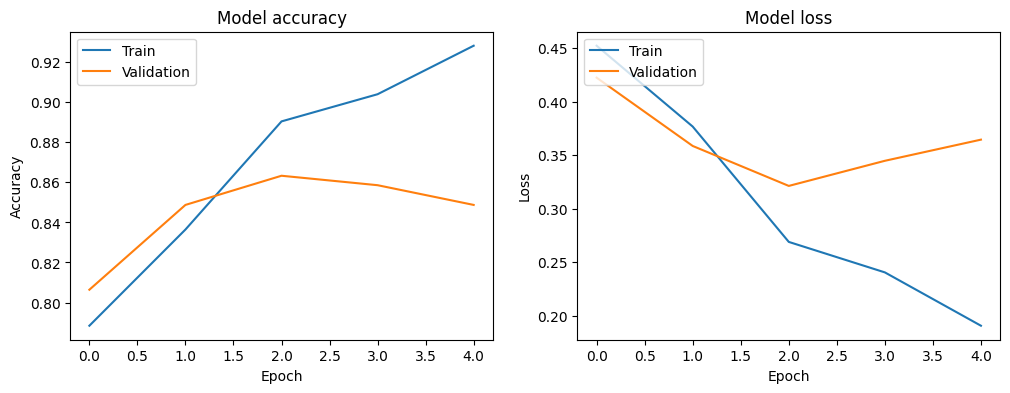

In [28]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [29]:
# Function to preprocess and predict sentiment of new reviews
def predict_sentiment(review, tokenizer, max_sequence_length, model):
    sequence = tokenizer.texts_to_sequences([review])
    padded_sequence = pad_sequences(sequence, maxlen=max_sequence_length)
    prediction = model.predict(padded_sequence)[0][0]
    sentiment = 'positive' if prediction > 0.5 else 'negative'
    return sentiment

# Test the function with a sample review
sample_review = "I am not happy"
predicted_sentiment = predict_sentiment(sample_review, tokenizer, max_sequence_length, model)
print(f"The predicted sentiment is: {predicted_sentiment}")

1/1 [==============================] - 1s 615ms/step
The predicted sentiment is: negative


In [31]:
# Test the function with a sample review
sample_review = "I am feeling happy"
predicted_sentiment = predict_sentiment(sample_review, tokenizer, max_sequence_length, model)
print(f"The predicted sentiment is: {predicted_sentiment}")

1/1 [==============================] - 0s 39ms/step
The predicted sentiment is: positive
